In [484]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("USA_Housing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [485]:
# Min Max Transformation
df["Avg. Area Income"]=(df["Avg. Area Income"]-min(df["Avg. Area Income"]))/(max(df["Avg. Area Income"])-min(df["Avg. Area Income"]))
#df["Avg. Area Income"].hist(bins=50)
df["Area Population"]=(df["Area Population"]-min(df["Area Population"]))/(max(df["Area Population"])-min(df["Area Population"]))


In [486]:
X=np.array(df.iloc[:,:5]) # X = independent Variables consider as 5 Features
Y=np.array(df.iloc[:,5:6]) #Y= Target variable
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,0.564890,5.977222,6.987792,3.981330,0.518234,1.232073e+06
std,0.118547,0.991456,1.005833,1.234137,0.142920,3.531176e+05
min,0.000000,2.644304,3.236194,2.000000,0.000000,1.593866e+04
25%,0.485889,5.322283,6.299250,3.140000,0.420903,9.975771e+05
50%,0.567350,5.970429,7.002902,4.050000,0.518751,1.232669e+06
75%,0.644977,6.650808,7.665871,4.490000,0.614676,1.471210e+06
max,1.000000,9.519088,10.759588,6.500000,1.000000,2.469066e+06


## Train Test Split

In [487]:
# 75 % fro train and 25% for test
split_value=round(len(X) - len(X)*0.25)
x_train=X[:split_value]
x_test=X[split_value:]
y_train=Y[:split_value]
y_test=Y[split_value:]

# Multivariate Linear Regression

[[1171113.02288221 1190194.99537375 1228068.25432388 ... 1076951.32913573
  1281012.59307133 1229627.85943892]]
Mean Squared Error is: 22905465.512860127


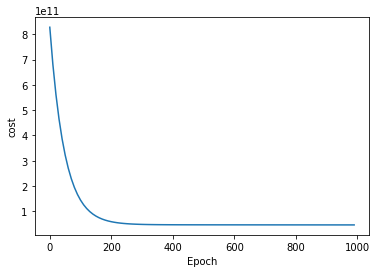

In [488]:
class Regression:
    def __init__(self,x_train):
        self.slope = np.zeros((1,(x_train.shape[0]))) # 1 x n
        self.Intercept = 0
    def Hypothesis_fn(self,x_train):
        h = np.dot(self.slope,x_train)+ self.Intercept  #slope= 1xn  and x_train =nXm  so, h=1xm
        return h
    def Cost_Function(self,h,y_train):
        m= y_train.shape[1]
        J=((1/(2*m))*(np.sum(np.square(h - y_train)))) #h=1xm y_train= 1xm
        return J
    def Gradient_descent(self,h,x_train,y_train):
        m = y_train.shape[1]
        dIntercept = (1/m)*(np.sum(h-y_train))
        dslope = (1/m)*np.dot((h-y_train),x_train.transpose())  # (h-y_train)=1xm x_train= mXn dslope=1Xn
        return dslope,dIntercept
    def train(self,x_train,y_train,iteration,learning_rate):
        cost=[]
        epoch_list=[]
        for i in range(iteration):
            h=self.Hypothesis_fn(x_train)
            J=self.Cost_Function(h,y_train)
            g=self.Gradient_descent(h,x_train,y_train)
            self.slope = self.slope - (learning_rate * g[0]) # slope 1Xn
            self.Intercept = self.Intercept- (learning_rate * g[1])
            if(i%10==0):
                cost.append(J)
                epoch_list.append(i)
        plt.plot(epoch_list,cost) #k[1] = Iteration and  k[0] = Cost
        plt.xlabel("Epoch")
        plt.ylabel("cost")    
    def predict(self,x_test):
        y_predict=np.dot(self.slope,x_test)+ self.Intercept
        return y_predict
        
x_train = x_train.transpose()  # n X m
y_train = y_train.transpose() #1 X m
x_test  = x_test.transpose()
y_test =  y_test.transpose()
epoch=1000
learning_rate=0.0001
rg=Regression(x_train) # object Creation
rg.train(x_train,y_train,epoch,learning_rate)  # Train the Model
y_predict=rg.predict(x_test)  # make Prediction
mse_scratch= np.sum(y_predict-y_test)  # Calculate mean squared Error
print(y_predict)
print("Mean Squared Error is:",mse_scratch)

# Comparision with Scikit-learn

In [489]:
from sklearn.linear_model import LinearRegression
Linear=LinearRegression()
Linear.fit(x_train.transpose(),y_train.transpose())
y_predict=Linear.predict(x_test.transpose())
mse_scikit= np.sum(y_predict-y_test)
print("Mean Squared Error is:",mse_scikit)

Mean Squared Error is: 5842815269.818504


## Which one is Best

In [490]:
# Just for Fun
if(mse_scratch< mse_scikit):
    print("Scratch is best")
else:
    print("Sklearn is best")

Scratch is best
